## 1. Breath alcohol tests in Ames, Iowa, USA
<p>Ames, Iowa, USA is the home of Iowa State University, a land grant university with over 36,000 students. By comparison, the city of Ames, Iowa, itself only has about 65,000 residents. As with any other college town, Ames has had its fair share of alcohol-related incidents. (For example, Google 'VEISHEA riots 2014'.) We will take a look at some breath alcohol test data from Ames that is published by the State of Iowa.</p>
<p><img style="width:500px" src="https://assets.datacamp.com/production/project_208/img/usa.jpg"> </p>
<p>The data file <code>'breath\alcohol\ames.csv'</code> contains 1,556 readings from breath alcohol tests administered by the Ames and Iowa State University Police Departments from January 2013 to December 2017. The columns in this data set are <code>year</code>, <code>month</code>, <code>day</code>, <code>hour</code>, <code>location</code>, <code>gender</code>, <code>Res1</code>, <code>Res2</code>.</p>

In [60]:
# Load the packages 
library(dplyr)
library(readr)
library(ggplot2)

# Read the data into your workspace
ba_data <- read_csv("datasets/breath_alcohol_ames.csv")

# Quickly inspect the data
head(ba_data)

# Obtain counts for each year 
# .... YOUR CODE FOR TASK 1 ....
ba_year <- ba_data %>% count(year)

Parsed with column specification:
cols(
  year = col_integer(),
  month = col_integer(),
  day = col_integer(),
  hour = col_integer(),
  location = col_character(),
  gender = col_character(),
  Res1 = col_double(),
  Res2 = col_double()
)


year month day hour location gender Res1  Res2 
1 2017 12    17  1    Ames PD  M      0.046 0.046
2 2017 12    14  3    ISU PD   F      0.121 0.120
3 2017 12    10  5    ISU PD   F      0.068 0.067
4 2017 12    10  3    ISU PD   F      0.077 0.077
5 2017 12     9  2    ISU PD   M      0.085 0.084
6 2017 12     9  1    Ames PD  M      0.160 0.161

## 2. What is the busiest police department in Ames?
<p>There are two police departments in the data set: the Iowa State University Police Department and the Ames Police Department. Which one administers more breathalyzer tests? </p>

In [62]:
# Count the totals for each department
pds <- ba_data %>% group_by(location) %>% count(location)
pds

location n  
1 Ames PD  616
2 ISU PD   940

## 3. Nothing Good Happens after 2am
<p><img src="https://assets.datacamp.com/production/project_208/img/himym02.jpg" style="float: left;margin:5px 20px 5px 1px;width:300px"></p>
<p>We all know that "nothing good happens after 2am." Thus, there are inevitably some times of the day when breath alcohol tests, especially in a college town like Ames, are most and least common. Which hours of the day have the most and least breathalyzer tests?  </p>

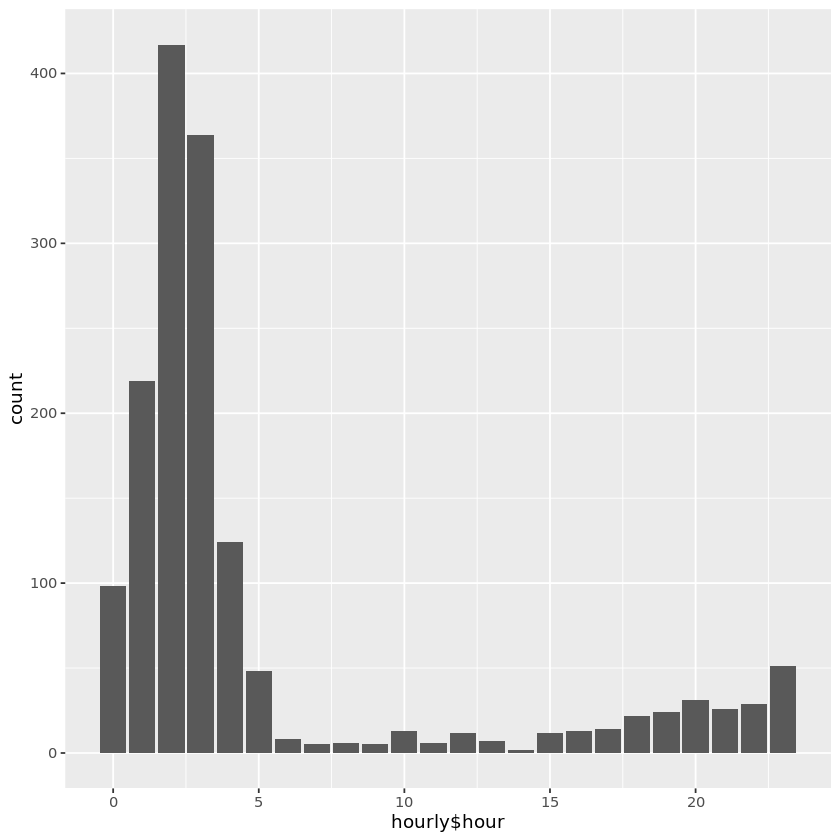

In [64]:
# Count by hour and arrange by descending frequency
hourly <- ba_data %>% group_by(hour) %>% count(hour) %>% arrange(desc(hour))
# Use a geom_ to create the appropriate bar chart
ggplot(hourly, aes(x = hourly$hour, weight = hourly$n)) + geom_bar()

## 4. Breathalyzer tests by month
<p>Now that we have discovered which time of day is most common for breath alcohol tests, we will determine which time of the year has the most breathalyzer tests. Which month will have the most recorded tests?</p>

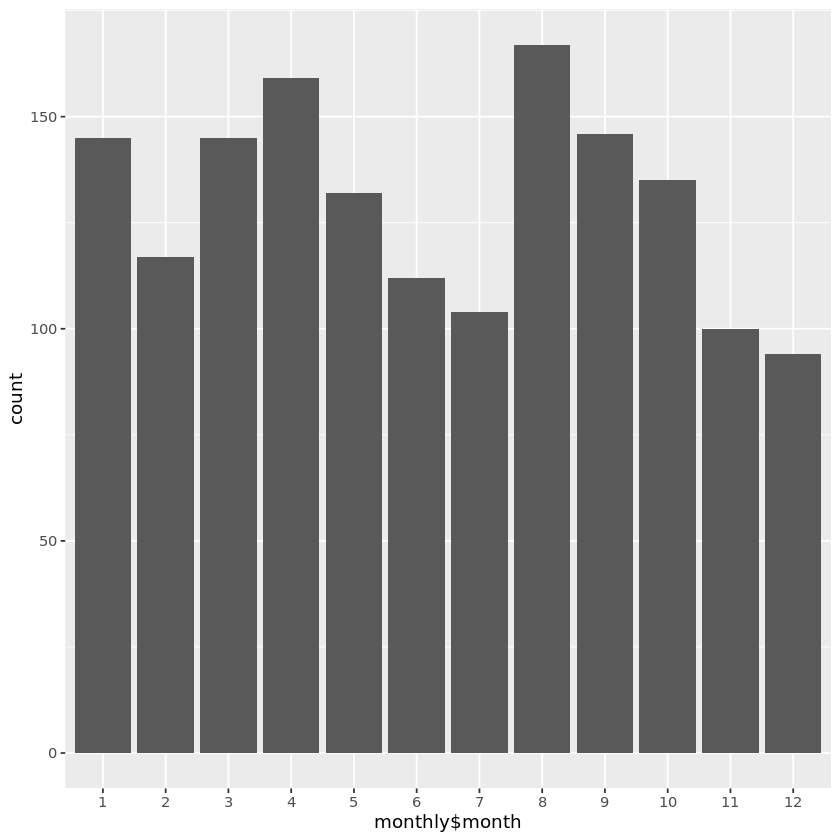

In [66]:
# Count by month and arrange by descending frequency
monthly <- ba_data %>% count(month,sort=TRUE)# group_by(month) %>% count(month) %>% arrange(desc())

# Make month a factor
monthly$month <- as.factor(monthly$month)

# Use a geom_ to create the appropriate bar chart
ggplot(monthly, aes(x=monthly$month, weight=monthly$n)) + geom_bar()

## 5. COLLEGE
<p><img src="https://assets.datacamp.com/production/project_208/img/PF2081John-Belushi-College-Posters.jpg" style="float: left;margin:5px 20px 5px 1px"> </p>
<p>When we think of (binge) drinking in college towns in America, we usually think of something like this image at the left. And so, one might suspect that breath alcohol tests are given to men more often than women and that men drink more than women. </p>

gender n   
1 F       425
2 M      1102
3 NA       29

year month day hour location gender Res1  Res2  meanRes
1    2017 12    17   1   Ames PD  M      0.046 0.046 0.0460 
2    2017 12    14   3   ISU PD   F      0.121 0.120 0.1205 
3    2017 12    10   5   ISU PD   F      0.068 0.067 0.0675 
4    2017 12    10   3   ISU PD   F      0.077 0.077 0.0770 
5    2017 12     9   2   ISU PD   M      0.085 0.084 0.0845 
6    2017 12     9   1   Ames PD  M      0.160 0.161 0.1605 
7    2017 12     7   3   Ames PD  M      0.131 0.131 0.1310 
8    2017 12     4   1   ISU PD   M      0.000 0.000 0.0000 
9    2017 12     3   1   Ames PD  M      0.091 0.090 0.0905 
10   2017 12     3   0   Ames PD  M      0.095 0.095 0.0950 
11   2017 12     2   1   Ames PD  M      0.155 0.155 0.1550 
12   2017 11    29   3   ISU PD   F      0.171 0.171 0.1710 
13   2017 11    21   3   ISU PD   F      0.050 0.051 0.0505 
14   2017 11    17  18   ISU PD   M      0.176 0.176 0.1760 
15   2017 11    11   3   Ames PD  M      0.072 0.072 0.0720 
16   2017 11    11   2   ISU PD   M      0.094 0.093 0.0935 
17   2017 11    11   2   ISU PD   F      0.106 0.106 0.1060 
18   2017 11    10   3   ISU PD   M      0.145 0.144 0.1445 
19   2017 11     9   2   Ames PD  F      0.148 0.148 0.1480 
20   2017 11     8   3   ISU PD   F      0.110 0.110 0.1100 
21   2017 11     6  19   Ames PD  F      0.000 0.000 0.0000 
22   2017 11     5   2   ISU PD   M      0.155 0.155 0.1550 
23   2017 11     5   0   Ames PD  M      0.114 0.113 0.1135 
24   2017 11     4   3   Ames PD  M      0.107 0.107 0.1070 
25   2017 11     3   3   ISU PD   M      0.000 0.000 0.0000 
26   2017 11     2   2   Ames PD  M      0.000 0.000 0.0000 
27   2017 10    29   5   Ames PD  F      0.164 0.164 0.1640 
28   2017 10    29   4   ISU PD   M      0.101 0.101 0.1010 
29   2017 10    29   4   Ames PD  M      0.116 0.116 0.1160 
30   2017 10    29   3   ISU PD   F      0.100 0.099 0.0995 
...  ...  ...   ... ...  ...      ...    ...   ...   ...    
1498 2013 1     26   1   Ames PD  M      0.099 0.098 0.0985 
1499 2013 1     25   1   ISU PD   M      0.094 0.094 0.0940 
1500 2013 1     22  22   ISU PD   M      0.000 0.000 0.0000 
1501 2013 1     21   3   ISU PD   M      0.059 0.058 0.0585 
1502 2013 1     20   4   ISU PD   M      0.159 0.158 0.1585 
1503 2013 1     20   2   Ames PD  F      0.195 0.194 0.1945 
1504 2013 1     20   2   Ames PD  M      0.155 0.155 0.1550 
1505 2013 1     20   1   ISU PD   M      0.140 0.139 0.1395 
1506 2013 1     19   3   Ames PD  F      0.129 0.128 0.1285 
1507 2013 1     18   4   ISU PD   M      0.111 0.110 0.1105 
1508 2013 1     18   3   ISU PD   M      0.089 0.090 0.0895 
1509 2013 1     15   2   ISU PD   M      0.141 0.140 0.1405 
1510 2013 1     13   3   ISU PD   F      0.028 0.028 0.0280 
1511 2013 1     13   2   Ames PD  F      0.130 0.128 0.1290 
1512 2013 1     13   2   Ames PD  M      0.209 0.209 0.2090 
1513 2013 1     13   1   Ames PD  M      0.239 0.237 0.2380 
1514 2013 1     13   1   Ames PD  F      0.118 0.117 0.1175 
1515 2013 1     12   4   ISU PD   M      0.144 0.144 0.1440 
1516 2013 1     12   2   ISU PD   M      0.125 0.125 0.1250 
1517 2013 1     12   1   ISU PD   M      0.055 0.055 0.0550 
1518 2013 1     11   4   Ames PD  M      0.181 0.182 0.1815 
1519 2013 1      9   3   Ames PD  M      0.000 0.000 0.0000 
1520 2013 1      9   3   ISU PD   F      0.134 0.133 0.1335 
1521 2013 1      9   3   ISU PD   F      0.000 0.000 0.0000 
1522 2013 1      6   1   ISU PD   F      0.085 0.085 0.0850 
1523 2013 1      5  23   Ames PD  M      0.182 0.181 0.1815 
1524 2013 1      4   2   ISU PD   M      0.066 0.065 0.0655 
1525 2013 1      1   3   Ames PD  M      0.090 0.090 0.0900 
1526 2013 1      1   2   ISU PD   F      0.132 0.131 0.1315 
1527 2013 1      1   0   ISU PD   M      0.130 0.130 0.1300

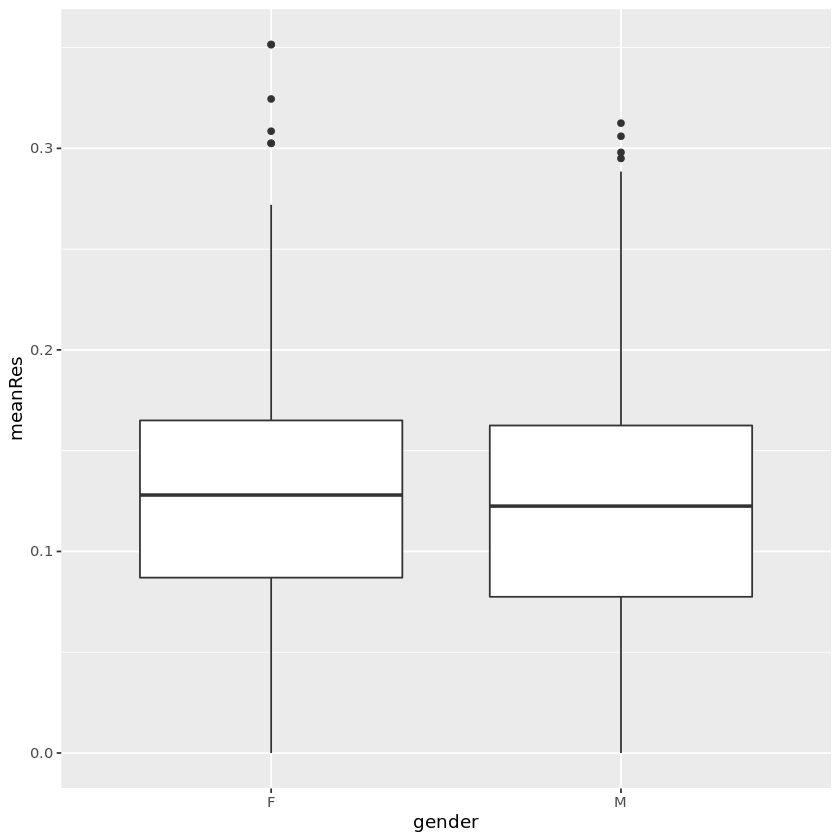

In [68]:
# Count by gender 
ba_data %>% group_by(gender) %>% count(gender)

# Create a dataset with no NAs in gender 
clean_gender <- ba_data %>% filter(!is.na(gender))
# Create a mean test result variable and save as mean_bas
mean_bas <- clean_gender %>% mutate(meanRes = (Res1+Res2)/2)
mean_bas
# Create side-by-side boxplots to compare the mean blood alcohol levels of men and women
ggplot(mean_bas, aes(y=meanRes,x=gender)) + geom_boxplot()

## 6. Above the legal limit
<p>In the USA, it is illegal to drive with a blood alcohol concentration (BAC) above 0.08%. This is the case for <a href="https://www.dmv.org/automotive-law/dui.php">all 50 states</a>. Assuming everyone tested in our data was driving (though we have no way of knowing this from the data), if either of the results (<code>Res1</code>, <code>Res2</code>) are above 0.08, the person would be charged with DUI (driving under the influence). </p>

In [70]:
# Filter the data
duis <- ba_data %>% filter(Res1>0.08|Res2>0.08)

# Proportion of tests that would have resulted in a DUI
p_dui <- nrow(duis)/nrow(ba_data)

## 7. Breathalyzer tests: is there a pattern over time?
<p>We previously saw that 2 a.m. is the most common time of day for breathalyzer tests to be administered, and August is the most common month of the year for breathalyzer tests. Now, we look at the weeks in the year over time. We briefly use the <a href="http://lubridate.tidyverse.org/"><code>lubridate</code></a> package for a bit of date-time manipulation. </p>

In [72]:
library(lubridate) 

# Create date variable using paste() and ymd()
ba_data <- ba_data %>% mutate(date = ymd(paste(year,month,day,sep='-')))

# Create a week variable using week()
ba_data <- ba_data %>% mutate(week = week(date))

## 8. Looking at timelines
<p>How do the weeks differ over time? One of the most common data visualizations is the time series, a line tracking the changes in a variable over time. We will use the new <code>week</code> variable to look at test frequency over time. We end with a time series plot showing frequency of breathalyzer tests by week in year, with one line for each year. </p>

week year n  
1   1    2013  6 
2   1    2014  5 
3   1    2015  7 
4   1    2016  4 
5   1    2017  4 
6   2    2013 12 
7   2    2014  3 
8   2    2015  8 
9   2    2016  5 
10  2    2017  8 
11  3    2013  9 
12  3    2014  6 
13  3    2015  6 
14  3    2016  6 
15  3    2017  9 
16  4    2013  5 
17  4    2014 12 
18  4    2015  7 
19  4    2016  4 
20  4    2017 10 
21  5    2013  5 
22  5    2014  7 
23  5    2015  4 
24  5    2016  2 
25  5    2017  1 
26  6    2013  8 
27  6    2014  8 
28  6    2015  4 
29  6    2016  3 
30  6    2017  4 
... ...  ...  ...
230 47   2013 5  
231 47   2014 7  
232 47   2015 7  
233 47   2016 2  
234 47   2017 1  
235 48   2013 5  
236 48   2014 4  
237 48   2015 4  
238 48   2016 5  
239 48   2017 2  
240 49   2013 9  
241 49   2014 8  
242 49   2015 5  
243 49   2016 7  
244 49   2017 6  
245 50   2013 7  
246 50   2014 6  
247 50   2015 1  
248 50   2017 3  
249 51   2013 6  
250 51   2014 6  
251 51   2015 4  
252 51   2016 3  
253 51   2017 1  
254 52   2013 5  
255 52   2014 5  
256 52   2015 3  
257 52   2016 1  
258 53   2015 1  
259 53   2016 1

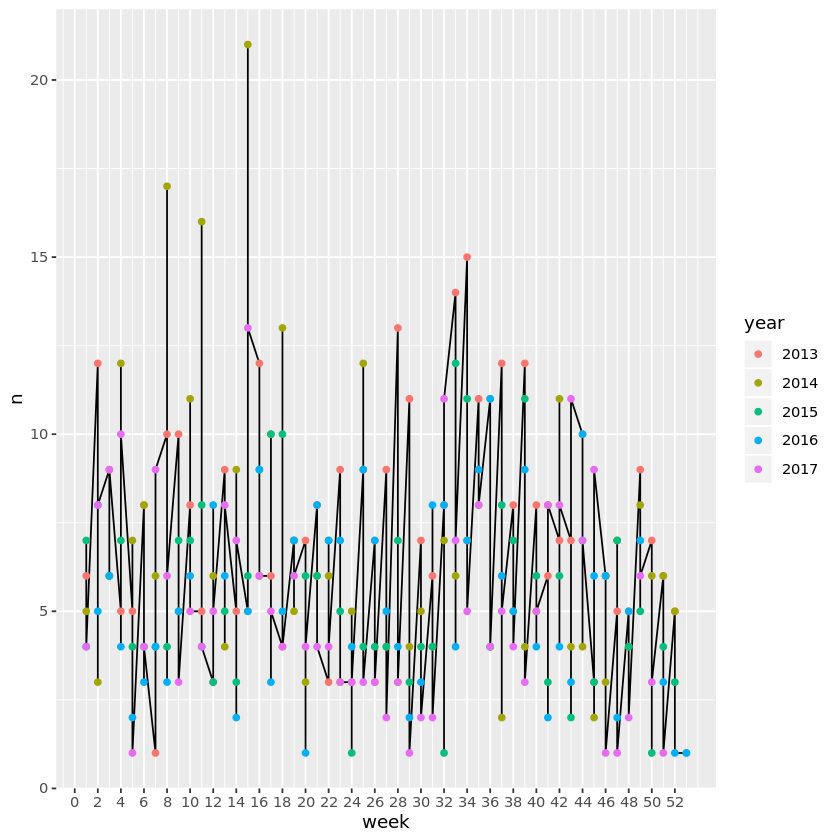

In [74]:
# Create the weekly data set 
weekly <- ba_data %>% count(week,year)

# Make year a factor
weekly <- weekly %>% mutate(year = as.factor(year))
weekly
# Create the time series plot with one line for each year
ggplot(weekly, aes(x = week, y = n))  + geom_line()+ 
  geom_point(aes(color = year)) +  
  scale_x_continuous(breaks = seq(0,52,2))

## 9. The end of VEISHEA
<p>From <a href="https://en.wikipedia.org/wiki/VEISHEA">Wikipedia</a>: 
"VEISHEA was an annual week-long celebration held each spring on the campus of Iowa State University in Ames, Iowa. The celebration featured an annual parade and many open-house demonstrations of the university facilities and departments. Campus organizations exhibited products, technologies, and held fundraisers for various charity groups. In addition, VEISHEA brought speakers, lecturers, and entertainers to Iowa State. [...] VEISHEA was the largest student-run festival in the nation, bringing in tens of thousands of visitors to the campus each year."</p>
<p>This over 90-year tradition in Ames was <a href="https://www.news.iastate.edu/news/2014/08/07/veisheaend">terminated permanently</a> after <a href="https://www.desmoinesregister.com/story/news/crime-and-courts/2014/04/09/veishea-ames-car-tipping/7495935/">riots in 2014</a>, where drunk celebrators flipped over multiple vehicles and tore light poles down. This was not the first incidence of violence and severe property damage in VEISHEA's history. Did former President Leath make the right decision?</p>

ERROR: Error in eval(expr, envir, enclos): object '....' not found


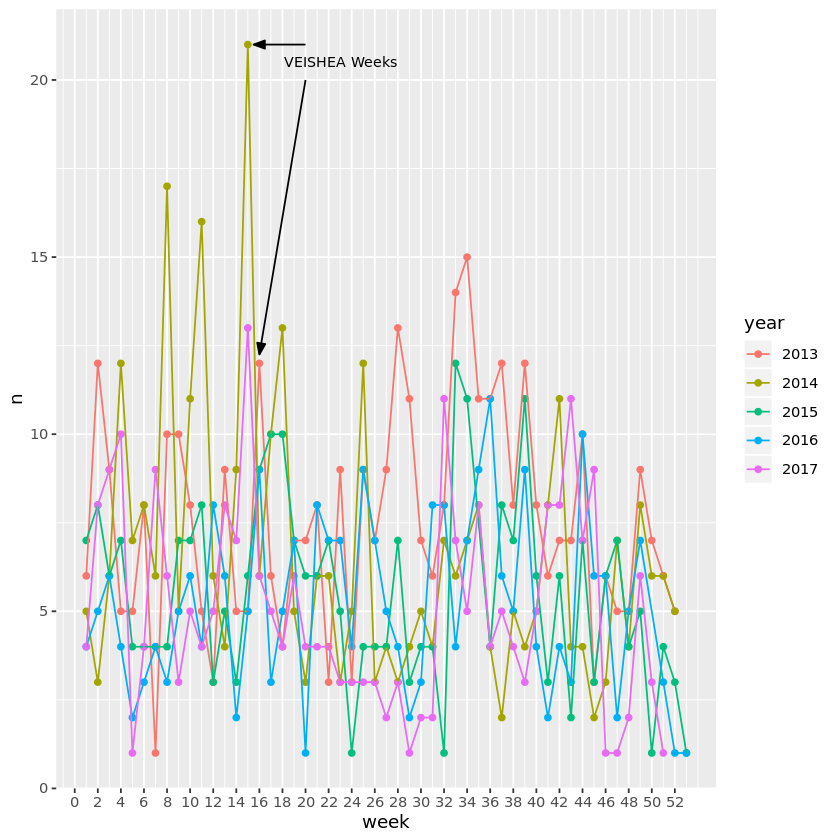

In [76]:
# Run this code to create the plot 
ggplot() + 
  geom_point(data = weekly, aes(x = week, y = n, color = year)) + 
  geom_line(data = weekly, aes(x = week, y = n, color = year)) +  # included to make the plot more readable 
  geom_segment(data = NULL, arrow = arrow(angle = 20, length = unit(0.1, "inches"),
                                          ends = "last", type = "closed"), 
               aes(x = c(20,20), xend = c(15.5,16), y = c(21, 20), yend = c(21, 12.25))) + 
  geom_text(data = NULL, aes(x = 23, y = 20.5, label = "VEISHEA Weeks"), size = 3) + 
  scale_x_continuous(breaks = seq(0,52,2)) 

# Make a decision about VEISHEA. TRUE or FALSE?  
cancelling_VEISHEA_was_right <- TRUE